In [215]:
import pandas as pd
from pandas.io.json import build_table_schema
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import scipy as sp
import os
import xgboost as xgb
import visualization as vis
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

DIR_PATH = './groups'

In [ ]:
# show all output and more columns and rows
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = 410

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train.head()
test.head()

In [ ]:
train_schema = pd.DataFrame(build_table_schema(train)['fields'])
test_schema = pd.DataFrame(build_table_schema(test)['fields'])
train_schema
test_schema

# Missing Data

In [216]:
(train.isnull().sum() / len(train)) * 100  

timestamp                                 0.000000
full_sq                                   0.085330
life_sq                                  22.376108
floor                                     0.548080
max_floor                                31.421070
material                                 31.414506
build_year                               47.607483
num_room                                 31.470299
kitch_sq                                 52.057762
state                                    44.496226
product_type                              0.000000
sub_area                                  0.000000
area_m                                    0.000000
raion_popul                               0.000000
green_zone_part                           0.000000
indust_part                               0.000000
children_preschool                        0.000000
preschool_quota                          21.949458
preschool_education_centers_raion         0.000000
children_school                

In [217]:
train_na = (train.isnull().sum() / len(train)) * 100    # count the na in each column
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)  # get rid off empty

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text xticklabel objects>)

[<matplotlib.text.Text at 0x119837950>, <matplotlib.text.Text at 0x119827d10>]

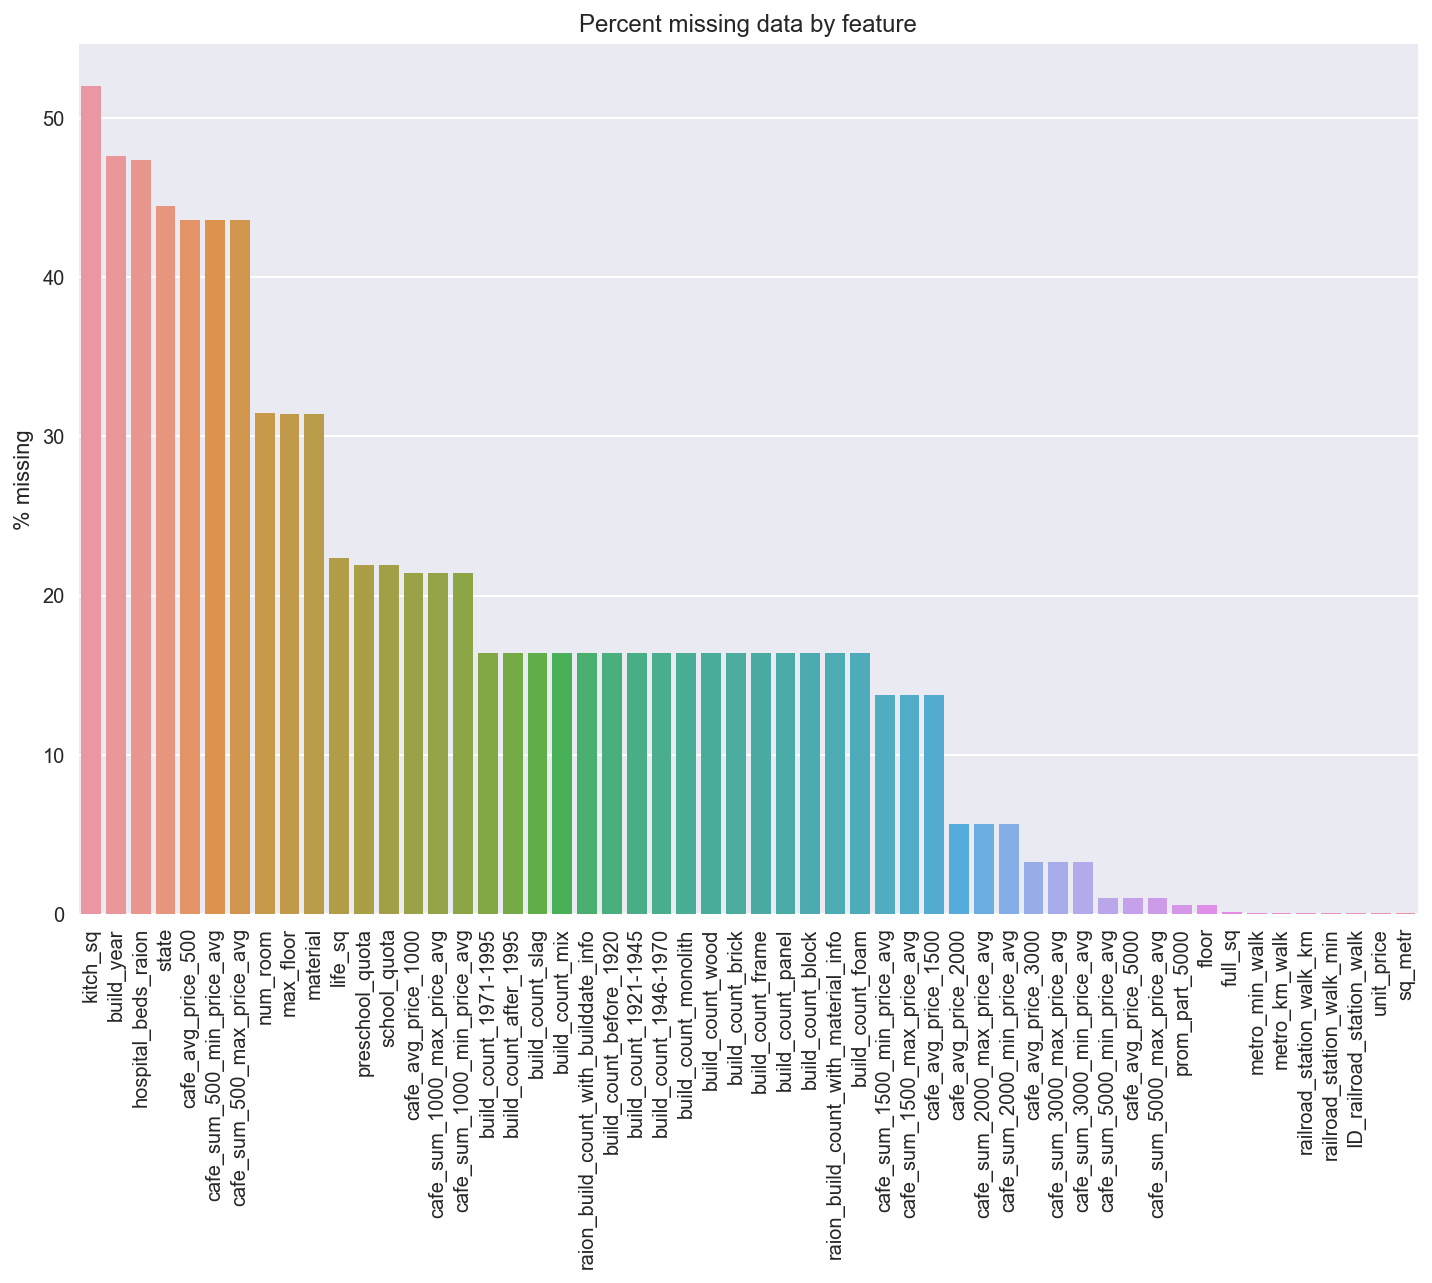

In [218]:
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
ax.set(title='Percent missing data by feature', ylabel='% missing')

## Buliding type

In [ ]:
building_type = pd.read_csv(os.path.join(DIR_PATH, 'building_type.csv'))
building_type_predictors = list(building_type['Predictor'])
building_type_predictors.append('price_doc')

In [ ]:
corrmatBT = train[building_type_predictors].corr()
corrmatBT1 = test[building_type_predictors[:-1]].corr()

In [ ]:
corrmatBT
corrmatBT1

In [ ]:
train_schema = pd.DataFrame(build_table_schema(train[building_type_predictors])['fields'])
#test_schema = pd.DataFrame(build_table_schema(test[industrial_facilities_predictors])['fields'])
train_schema

In [ ]:
corrmatBT.iloc[:,-1].sort_values() # for price column


In [ ]:
f, ax = plt.subplots(figsize=(11, 11))
plt.xticks(rotation='90')
sns.heatmap(corrmatBT, square=True, linewidths=.5, annot=True)

f, ax = plt.subplots(figsize=(11, 11))
plt.xticks(rotation='90')
sns.heatmap(corrmatBT1, square=True, linewidths=.5, annot=True)

## Cafe & Restaurants

In [ ]:
cafe_restaurants = pd.read_csv(os.path.join(DIR_PATH, 'cafe_restaurants.csv'))  # resaved as CSV
cafe_restaurants_predictors = list(cafe_restaurants['Predictor'])
cafe_restaurants_predictors.append('price_doc')

In [ ]:
cafe_restaurants.head()

In [ ]:
corrmatCR = train[cafe_restaurants_predictors].corr()
corrmatCR1 = test[cafe_restaurants_predictors[:-1]].corr()
corrmatCR
corrmatCR1

In [ ]:
train_schema = pd.DataFrame(build_table_schema(train[cafe_restaurants_predictors])['fields'])
#test_schema = pd.DataFrame(build_table_schema(test[industrial_facilities_predictors])['fields'])
train_schema

In [ ]:
corrmatCR.iloc[:,-1].sort_values() # for price column

In [ ]:
# no need to draw the graph ,data set is big

## churches

In [ ]:
churches = pd.read_csv(os.path.join(DIR_PATH, 'churches.csv'))
churches_predictors = list(churches['Predictor'])
churches_predictors.append('price_doc')

In [ ]:
churches_predictors

In [ ]:
corrmatCH = train[churches_predictors].corr()
corrmatCH1 = test[churches_predictors[:-1]].corr()
corrmatCH
corrmatCH1

In [ ]:
corrmatCH.iloc[:,-1].sort_values()

In [ ]:
f, ax = plt.subplots(figsize=(11, 11))
plt.xticks(rotation='90')
sns.heatmap(corrmatCH, square=True, linewidths=.5, annot=True)

f, ax = plt.subplots(figsize=(11, 11))
plt.xticks(rotation='90')
sns.heatmap(corrmatCH1, square=True, linewidths=.5, annot=True)

In [ ]:
# Demo

In [ ]:
demographics = pd.read_csv(os.path.join(DIR_PATH, 'demographics.csv'))
demographics_predictors = list(demographics['Predictor'])
demographics_predictors.append('price_doc')

demographics_age = pd.read_csv(os.path.join(DIR_PATH, 'demographics_age.csv'))
demographics_age_predictors = list(demographics_age['Predictor'])
demographics_age_predictors.append('price_doc')

In [ ]:
corrmatDP = train[demographics_predictors].corr()
corrmatDP1 = test[demographics_predictors[:-1]].corr()
corrmatDPA = train[demographics_age_predictors].corr()
corrmatDPA1 = test[demographics_age_predictors[:-1]].corr()
corrmatDP
corrmatDP1
corrmatDPA
corrmatDHA1

In [ ]:
corrmatDP.iloc[:,-1].sort_values()

print '-----------------------' * 5

corrmatDPA.iloc[:,-1].sort_values()


## Distance to Road

In [ ]:
distance_to_road = pd.read_csv(os.path.join(DIR_PATH, 'distance_to_road.csv'))
distance_to_road_predictors = ['big_road1_km','ID_big_road1','big_road1_1line','big_road2_km','ID_big_road2','mkad_km','ttk_km']
distance_to_road_predictors.append('price_doc')

In [ ]:
distance_to_road_predictors

In [ ]:
corrmatDR = train[distance_to_road_predictors].corr()
corrmatDR1 = test[distance_to_road_predictors[:-1]].corr()
corrmatDR 
corrmatDR1

In [ ]:
corrmatDR.iloc[:,-1].sort_values()

In [ ]:
f, ax = plt.subplots(figsize=(11, 11))
plt.xticks(rotation='90')
sns.heatmap(corrmatDR, square=True, linewidths=.5, annot=True)

f, ax = plt.subplots(figsize=(11, 11))
plt.xticks(rotation='90')
sns.heatmap(corrmatDR1, square=True, linewidths=.5, annot=True)

## industry

In [ ]:
industrial_places = pd.read_csv(os.path.join(DIR_PATH, 'industrial_places.csv'))
industrial_places_predictors = list(industrial_places['Predictor'])
industrial_places_predictors.append('price_doc')


In [ ]:
industrial_facilities = pd.read_csv(os.path.join(DIR_PATH, 'industrial_facilities.csv'))
industrial_facilities_predictors= list(industrial_facilities['Predictor'])
industrial_facilities_predictors.append('price_doc')

In [ ]:
industrial_places_predictors

In [ ]:
train[industrial_facilities_predictors].head()

In [ ]:
corrmatIP = train[industrial_places_predictors].corr()
corrmatIP1 = test[industrial_places_predictors[:-1]].corr()

corrmatIP
corrmatIP1

corrmatIF = train[industrial_facilities_predictors].corr()                  # strings
corrmatIF1 = test[industrial_facilities_predictors[:-1]].corr()             # strings

corrmatIF
corrmatIF1

In [ ]:
train[industrial_facilities_predictors].corr()

In [ ]:
train_schema = pd.DataFrame(build_table_schema(train[industrial_facilities_predictors])['fields'])
#test_schema = pd.DataFrame(build_table_schema(test[industrial_facilities_predictors])['fields'])
train_schema
#test_schema

In [ ]:
f, ax = plt.subplots(figsize=(11, 11))
plt.xticks(rotation='90')
sns.heatmap(corrmatIP, square=True, linewidths=.5, annot=True)

f, ax = plt.subplots(figsize=(11, 11))
plt.xticks(rotation='90')
sns.heatmap(corrmatIP1, square=True, linewidths=.5, annot=True)

## Life Style

In [ ]:
life_style_centers = pd.read_csv(os.path.join(DIR_PATH, 'life_style_centers.csv'))
life_style_centers_predictors = list(life_style_centers['Predictor'])
life_style_centers_predictors.append('price_doc')

In [ ]:
lifestyle_facilities = pd.read_csv(os.path.join(DIR_PATH, 'lifestyle_facilities.csv'))
lifestyle_facilities_predictors= list(lifestyle_facilities['Predictor'])
lifestyle_facilities_predictors.append('price_doc')


In [ ]:
train_schema = pd.DataFrame(build_table_schema(train[life_style_centers_predictors])['fields'])

train_schema

In [ ]:
train_schema = pd.DataFrame(build_table_schema(train[lifestyle_facilities_predictors])['fields'])

train_schema

In [ ]:
corrmatLFC = train[life_style_centers_predictors].corr()
corrmatLFC1 = test[life_style_centers_predictors[:-1]].corr()

corrmatLFC
corrmatLFC1

corrmatLFF = train[lifestyle_facilities_predictors].corr()                  # strings
corrmatLFF1 = test[lifestyle_facilities_predictors[:-1]].corr()             # strings

corrmatLFF
corrmatLFF1

In [ ]:
len(life_style_centers_predictors)
len(lifestyle_facilities_predictors)

# market

In [ ]:
market = pd.read_csv(os.path.join(DIR_PATH, 'market.csv'))
market_predictors = list(market['Predictor'])
market_predictors.append('price_doc')

In [ ]:
train_schema = pd.DataFrame(build_table_schema(train[market_predictors])['fields'])

train_schema

In [ ]:
corrmatMT = train[market_predictors].corr()
corrmatMT1 = test[market_predictors[:-1]].corr()

corrmatMT
corrmatMT1

In [ ]:
f, ax = plt.subplots(figsize=(11, 11))
plt.xticks(rotation='90')
sns.heatmap(corrmatMT, square=True, linewidths=.5, annot=True)

f, ax = plt.subplots(figsize=(11, 11))
plt.xticks(rotation='90')
sns.heatmap(corrmatMT1, square=True, linewidths=.5, annot=True)

In [ ]:
# neighboorhood 

In [ ]:
neighborhood_char = pd.read_csv(os.path.join(DIR_PATH, 'neighborhood char.csv'))
neighborhood_char_predictors= list(neighborhood_char['Predictor'])
neighborhood_char_predictors.append('price_doc')

In [ ]:
train_schema = pd.DataFrame(build_table_schema(train[neighborhood_char_predictors])['fields'])

train_schema

In [ ]:
corrmatNH = train[neighborhood_char_predictors].corr()
corrmatNH1 = test[neighborhood_char_predictors[:-1]].corr()

corrmatNH
corrmatNH1

In [ ]:
f, ax = plt.subplots(figsize=(11, 11))
plt.xticks(rotation='90')
sns.heatmap(corrmatNH, square=True, linewidths=.5, annot=True)

f, ax = plt.subplots(figsize=(11, 11))
plt.xticks(rotation='90')
sns.heatmap(corrmatNH1, square=True, linewidths=.5, annot=True)

## park and water

In [ ]:

park_and_water = pd.read_csv(os.path.join(DIR_PATH, 'park_and_water.csv'))
park_and_water_predictors = list(park_and_water['Predictor'])
park_and_water_predictors.append('price_doc')

In [ ]:
train_schema = pd.DataFrame(build_table_schema(train[park_and_water_predictors])['fields'])

train_schema

In [ ]:
corrmatPW = train[park_and_water_predictors].corr()
corrmatPW1 = test[park_and_water_predictors[:-1]].corr()

corrmatPW
corrmatPW1

In [ ]:
f, ax = plt.subplots(figsize=(11, 11))
plt.xticks(rotation='90')
sns.heatmap(corrmatPW, square=True, linewidths=.5, annot=True)

f, ax = plt.subplots(figsize=(11, 11))
plt.xticks(rotation='90')
sns.heatmap(corrmatPW1, square=True, linewidths=.5, annot=True)

# Public transportation

In [ ]:
public_transportation = pd.read_csv(os.path.join(DIR_PATH, 'public_transportation.csv'))
public_transportation_predictors = list(public_transportation['Predictor'])
public_transportation_predictors.append('price_doc')

In [ ]:
train_schema = pd.DataFrame(build_table_schema(train[public_transportation_predictors])['fields'])

train_schema

In [ ]:
corrmatPT = train[public_transportation_predictors].corr()
corrmatPT1 = test[public_transportation_predictors[:-1]].corr()

corrmatPT
corrmatPT1

In [ ]:
corrmatPT.iloc[:,-1].sort_values() # for price column

## School and Health

In [ ]:

school_office_and_health = pd.read_csv(os.path.join(DIR_PATH, 'school_office_and_health.csv'))
school_office_and_health_predictors = list(school_office_and_health['Predictor'])
school_office_and_health_predictors.append('price_doc')

In [ ]:
train_schema = pd.DataFrame(build_table_schema(train[school_office_and_health_predictors])['fields'])

train_schema

In [ ]:
corrmatSH = train[school_office_and_health_predictors].corr()
corrmatSH1 = test[school_office_and_health_predictors[:-1]].corr()

corrmatSH
corrmatSH1

In [ ]:
corrmatSH.iloc[:,-1].sort_values() # for price column

# shopping

In [ ]:

shopping_center = pd.read_csv(os.path.join(DIR_PATH, 'shopping_center.csv'))
shopping_center_predictors = list(shopping_center['Predictor'])
shopping_center_predictors .append('price_doc')

In [ ]:
train_schema = pd.DataFrame(build_table_schema(train[shopping_center_predictors])['fields'])

train_schema

In [ ]:
corrmatSP = train[shopping_center_predictors].corr()
corrmatSP1 = test[shopping_center_predictors[:-1]].corr()

corrmatSP
corrmatSP1

In [ ]:
corrmatSP.iloc[:,-1].sort_values() # for price column

In [ ]:
f, ax = plt.subplots(figsize=(11, 11))
plt.xticks(rotation='90')
sns.heatmap(corrmatSP, square=True, linewidths=.5, annot=True)

f, ax = plt.subplots(figsize=(11, 11))
plt.xticks(rotation='90')
sns.heatmap(corrmatSP1, square=True, linewidths=.5, annot=True)

## Sports

In [ ]:

sports = pd.read_csv(os.path.join(DIR_PATH, 'sports.csv'))
sports_predictors = list(sports['Predictor'])
sports_predictors.append('price_doc')

In [ ]:
train_schema = pd.DataFrame(build_table_schema(train[sports_predictors])['fields'])

train_schema

In [ ]:
corrmatST = train[sports_predictors].corr()
corrmatST1 = test[sports_predictors[:-1]].corr()

corrmatST
corrmatST1

In [ ]:
f, ax = plt.subplots(figsize=(11, 11))
plt.xticks(rotation='90')
sns.heatmap(corrmatST, square=True, linewidths=.5, annot=True)

f, ax = plt.subplots(figsize=(11, 11))
plt.xticks(rotation='90')
sns.heatmap(corrmatST1, square=True, linewidths=.5, annot=True)

# Modeling Xgboost  ## Buliding type

In [214]:
## label encoding   to ask to encode of the feature before the XGBoost
from sklearn.preprocessing import LabelEncoder

label_encoder = dict()

for feature in (['product_type', 'sub_area','big_road1_1line','thermal_power_plant_raion','incineration_raion',\
                 'oil_chemistry_raion','radiation_raion','railroad_terminal_raion','nuclear_reactor_raion','detention_facility_raion',\
                'culture_objects_top_25','big_market_raion','ecology','water_1line','railroad_1line']):
    print('encoding feature: {}'.format(feature))
    label_encoder[feature] = LabelEncoder()
    label_encoder[feature].fit(train[feature])
    train.loc[:, feature + '_le'] = label_encoder[feature].transform(train[feature])
    test.loc[:, feature + '_le'] = label_encoder[feature].transform(test[feature])

encoding feature: product_type


LabelEncoder()

encoding feature: sub_area


LabelEncoder()

encoding feature: big_road1_1line


LabelEncoder()

encoding feature: thermal_power_plant_raion


LabelEncoder()

encoding feature: incineration_raion


LabelEncoder()

encoding feature: oil_chemistry_raion


LabelEncoder()

encoding feature: radiation_raion


LabelEncoder()

encoding feature: railroad_terminal_raion


LabelEncoder()

encoding feature: nuclear_reactor_raion


LabelEncoder()

encoding feature: detention_facility_raion


LabelEncoder()

encoding feature: culture_objects_top_25


LabelEncoder()

encoding feature: big_market_raion


LabelEncoder()

encoding feature: ecology


LabelEncoder()

encoding feature: water_1line


LabelEncoder()

encoding feature: railroad_1line


LabelEncoder()

In [ ]:
# Convert to numpy values
#model_features = key41[:-1]   
model_features = macroID

X_train = train[model_features].values
Y_train = train['log_price_doc'].values
X_test = test[model_features].values

print(X_train.shape)  
print(Y_train.shape)
print(X_test.shape)

In [ ]:
model_features=list(set(model_features))
len(model_features)
model_features

In [ ]:
size_ = 7000  # to ask*****************   subtract 7000
X_train_sub, Y_train_sub = X_train[:-size_],  Y_train[:-size_]
X_val, Y_val = X_train[-size_:],  Y_train[-size_:]

In [ ]:
X_train_sub.shape
Y_train_sub.shape
X_val.shape
Y_val.shape

In [ ]:
# Create DMatrix for xgboost
dtrain = xgb.DMatrix(X_train, 
                    Y_train, 
                    feature_names=model_features)
dtrain_sub = xgb.DMatrix(X_train_sub, 
                        Y_train_sub, 
                        feature_names=model_features)
d_val = xgb.DMatrix(X_val, 
                    Y_val, 
                    feature_names=model_features)
dtest = xgb.DMatrix(X_test, 
                    feature_names=model_features)

In [ ]:
# hyperparameters
xgb_params = {
    'eta': 0.02,
    'max_depth': 5,
    'subsample': .8,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

sub_model = xgb.train(xgb_params, 
                      dtrain_sub, 
                      num_boost_round=3000,
                      evals=[(d_val, 'val')],
                      early_stopping_rounds=50, 
                      verbose_eval=20)

In [ ]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 7,
    'subsample': .8,
    'colsample_bytree': 0.8,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

model = xgb.cv(xgb_params,
               dtrain=dtrain, 
               num_boost_round=3000,
                      nfold=5,
                      early_stopping_rounds=20,
                              verbose_eval=50)

model[['train-rmse-mean', 'test-rmse-mean']].plot()


In [ ]:
best_boost_rounds = len(model)
best_model = xgb.train(dict(xgb_params, silent=0), 
                       dtrain, num_boost_round= best_boost_rounds)

#fig, ax = plt.subplots(1, 1, figsize=(8, 13))
pd.DataFrame(best_model.get_fscore().items(), columns=['feature','importance']).sort_values('importance', ascending=False)

In [ ]:
log_y_pred = best_model.predict(dtest)
y_pred = np.exp(log_y_pred) - 1

In [ ]:
xgb.plot_importance(sub_model)

In [ ]:
pd.DataFrame(sub_model.get_fscore().items(), columns=['feature','importance']).sort_values('importance', ascending=False)

In [ ]:
full_model = xgb.train(xgb_params,
                       dtrain, 
                       num_boost_round=sub_model.best_iteration,
                       verbose_eval=20)

In [ ]:
log_y_pred = full_model.predict(dtest)
y_pred = np.exp(log_y_pred) - 1

In [ ]:
submit = pd.DataFrame({'id': np.array(test.index), 'price_doc': y_pred})
submit.to_csv('submissionall40.csv', index=False)

In [ ]:
submit = pd.DataFrame({'id': np.array(test.index), 'price_doc': y_pred})
submit.to_csv('submission.csv', index=False)

In [ ]:
np.arange(30474,38136)

In [ ]:
submit = pd.DataFrame({'id': np.arange(30474,38136), 'price_doc': y_pred})
submit.to_csv('submission40CV.csv', index=False)

In [ ]:
l = map(( lambda x: x+ '_le'), l)

In [ ]:
l

In [ ]:

lifestyle_facilities_predictors.append('culture_objects_top_25_le')

In [ ]:
public_transportation_predictors.append('railroad_1line_le')

In [ ]:
 lifestyle_facilities_predictors

In [ ]:
public_transportation_predictors

In [ ]:
park_and_water_predictors.append('ecology_le')

In [ ]:
park_and_water_predictors

In [ ]:
sub_model 

# Predictor selection  Top#3

In [ ]:
park_and_water_predictors

In [ ]:
ç,

In [ ]:
building_type_predictors

In [ ]:
'raion_build_count_with_material_info', 'build_count_block','build_count_brick',

In [ ]:
cafe_restaurants_predictors 

In [ ]:
'cafe_sum_5000_min_price_avg','cafe_sum_1000_min_price_avg', 'cafe_sum_2000_min_price_avg',

In [ ]:
churches_predictors

In [ ]:
'mosque_km','big_church_km','church_synagogue_km',

In [ ]:
demographics_predictors

In [ ]:
'full_all','young_all','male_f',

In [ ]:
demographics_age_predictors 

In [ ]:
 '0_13_male', '16_29_female','0_17_female',

In [ ]:
distance_to_road_predictors

In [ ]:
 'ttk_km','big_road1_km','big_road2_km',

In [ ]:
industrial_places_predictors

In [ ]:
'power_transmission_line_km','water_treatment_km','thermal_power_plant_km',

In [ ]:
industrial_facilities_predictors

In [ ]:
'incineration_raion_le','oil_chemistry_raion_le','thermal_power_plant_raion_le',

In [ ]:
life_style_centers_predictors

In [ ]:
'leisure_count_2000', 'swim_pool_km', 'exhibition_km',

In [ ]:
lifestyle_facilities_predictors

In [ ]:
'additional_education_raion','culture_objects_top_25_le','culture_objects_top_25_raion',

In [ ]:
market_predictors

In [ ]:
'market_count_1000','market_shop_km','market_count_3000',

In [ ]:
neighborhood_char_predictors

In [ ]:
'children_preschool','healthcare_centers_raion','raion_popul',

In [ ]:
public_transportation_predictors 

In [ ]:
 'public_transport_station_km','public_transport_station_min_walk','railroad_1line_le'

In [ ]:
school_office_and_health_predictors 

In [ ]:
'public_healthcare_km','additional_education_km','kindergarten_km',

In [ ]:
shopping_center_predictors 


In [ ]:
'shopping_centers_km','trc_sqm_5000','trc_sqm_3000',

In [ ]:
sports_predictors

In [ ]:
 sp=['sport_count_3000','sport_count_2000','sport_count_1500']

In [ ]:
submaster=['sport_count_3000','sport_count_2000','sport_count_1500','shopping_centers_km','trc_sqm_5000','trc_sqm_3000',\
'public_healthcare_km','additional_education_km','kindergarten_km', 'public_transport_station_km','public_transport_station_min_walk','railroad_1line_le',\
'children_preschool','healthcare_centers_raion','raion_popul','market_count_1000','market_shop_km','market_count_3000',\
'additional_education_raion','culture_objects_top_25_le','culture_objects_top_25_raion','leisure_count_2000', 'swim_pool_km', 'exhibition_km',\
'incineration_raion_le','oil_chemistry_raion_le','thermal_power_plant_raion_le','power_transmission_line_km','water_treatment_km','thermal_power_plant_km',\
 'ttk_km','big_road1_km','big_road2_km','0_13_male', '16_29_female','0_17_female','full_all','young_all','male_f','mosque_km','big_church_km','church_synagogue_km',\
'cafe_sum_5000_min_price_avg','cafe_sum_1000_min_price_avg', 'cafe_sum_2000_min_price_avg','raion_build_count_with_material_info', 'build_count_block','build_count_brick']

In [ ]:
len(submaster)

In [ ]:
main= ['year', 'month','full_sq', 'life_sq', 'floor', 
                     'max_floor', 'material', 'build_year', 'num_room',
                     'kitch_sq', 'state', 'product_type_le', 'sub_area_le']

all=main+submaster

In [ ]:
len(all)

In [ ]:
model_features = ['year', 'month', 'full_sq', 'life_sq', 'floor', 
                  'max_floor', 'material', 'build_year', 'num_room',
                  'kitch_sq', 'state', 'product_type_le', 'sub_area_le']

In [ ]:
pd.DataFrame(sub_model.get_fscore().items(), columns=['feature','importance']).sort_values('importance', ascending=False)

In [ ]:
macroID= pd.read_csv('macroID.csv')
macroID=list(macroID['Predictor'])
macroID

In [ ]:

macroID

In [ ]:
key = pd.read_csv(os.path.join(DIR_PATH, 'key_features.csv'))
key
key_predictors = list(key['Predictors'])
key_predictors
#key_predictors.append('price_doc')

In [ ]:
len(key_predictors)

In [ ]:
train_schema = pd.DataFrame(build_table_schema(train[key40])['fields'])

train_schema

In [ ]:
key_predictors[23:25]=['incineration_raion_le','oil_chemistry_raion_le']

In [ ]:
key_predictors[27] ='culture_objects_top_25_le'       #['railroad_1line_le']

In [ ]:
key_predictors[9:11]=['product_type_le', 'sub_area_le']

In [ ]:
key_predictors

In [ ]:
key_predictors[27]=str(key_predictors[27])

In [ ]:
type(key_predictors[27])

In [ ]:
key_predictors[35]='railroad_1line_le'

In [ ]:
key40=key_predictors

In [ ]:
key40=key41[:-1]

In [ ]:
key40=key40+['year','month']

In [ ]:
len(key40)

In [ ]:
key40.append('density')

In [ ]:
key41=key40

In [ ]:
key40csv=key40

In [ ]:
key40csv=pd.DataFrame(key40)

In [ ]:
key40csv.to_csv('key40.csv',index=0)

In [ ]:
key40 = pd.read_csv(os.path.join(DIR_PATH, 'key40.csv'),header= None)
key40.columns=['Predictor']
key40 = list(key40['Predictor'])


In [ ]:
key41

In [ ]:
keynew.remove('kitch_sq')

In [ ]:
submit1=pd.read_csv('submission41.csv')

In [ ]:
submit1['price_doc']=0.992*submit1['price_doc']

In [ ]:
submit1.to_csv('submit1.csv',index=False)

In [ ]:
# density 

# Clean other predictor

## missing values

In [ ]:
train_na = (train[key41].isnull().sum() / len(train)) * 100    # count the na in each column
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)  # get rid off empty

In [ ]:
%config InlineBackend.figure_format = 'retina'   # high resolution
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
ax.set(title='Percent missing data by feature', ylabel='% missing')

In [ ]:
set(key40).symmetric_difference(set(main))

In [ ]:
key41=key40[:-5]
key41

In [ ]:
# correlation mateix
corrmat = train[key40].corr()
c = corrmat.abs()
s = c.unstack()
type(s)
so = s.sort_values()
print so[-99:-39] # top 30 correlated features

In [ ]:
train['density'] = train['raion_popul'] /( train['area_m']/1000000)


In [ ]:
test['density'] = test['raion_popul'] /( test['area_m']/1000000)

In [ ]:
key41=key40  # adding density

In [ ]:
key41


In [ ]:
train[key40].head()

In [ ]:
# timestamp, key40 no density

In [ ]:
keyvalues=['timestamp']+key40   # no density

In [ ]:
keyvalues=keyvalues[:-1]

In [ ]:
keyvalues=keyvalues+['price_doc','unit_price','log_price_doc']

In [ ]:
train[keyvalues].to_csv('trainXGB.csv',index=0)

In [ ]:
test[keyvalues].to_csv('testXGB.csv',index=0)